## Ejemplo 1
Si la transformada de Fourier de la función temporal no posee Deltas de Dirac, se puede ingresar la función
temporal en el programa y aplicar el comando fourier, el cual entrega la transformada de Fourier de forma
simbólica. Cabe aclarar que dicho comando entrega la transformada en frecuencia angular (w), por eso se
aplica el comando subs donde se reemplaza ω por 2πf para que se obtenga en función de la frecuencia.
Al cargar el módulo symbolic se permite manipular variables simbólicas y usar la función Heaviside.

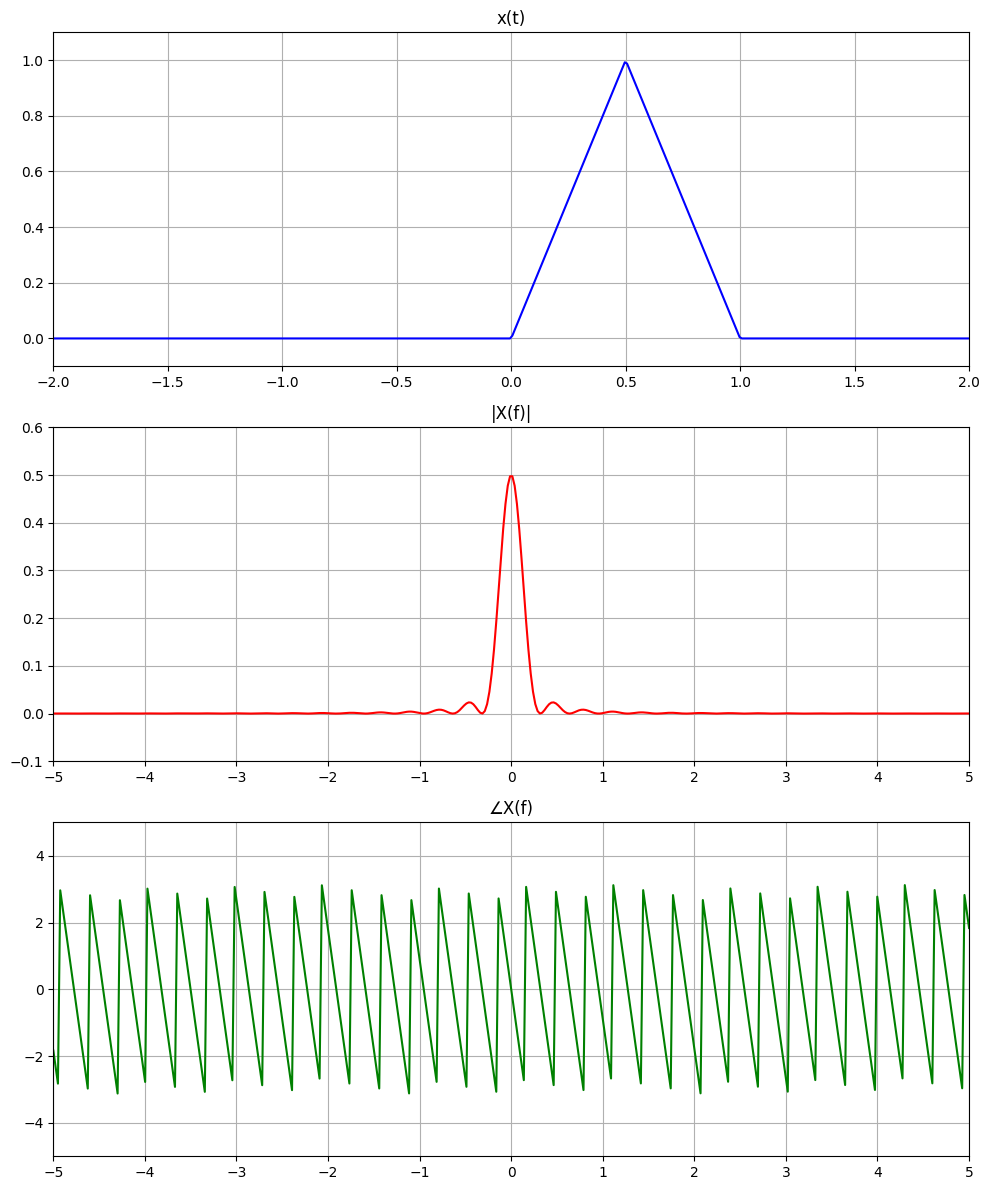

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir variables simbólicas
t, w, f = sp.symbols('t w f')

# Definir la función temporal x(t)
x = (2 * t) * (sp.Heaviside(t) - sp.Heaviside(t - 1/2)) + (2 * (-t + 1)) * (sp.Heaviside(t - 1/2) - sp.Heaviside(t - 1))

# Crear una figura con subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Graficar x(t)
t_vals = np.linspace(-2, 2, 400)
x_vals = [sp.re(x.subs(t, val)) for val in t_vals]
axs[0].plot(t_vals, x_vals, 'b')
axs[0].axis([-2, 2, -0.1, 1.1])
axs[0].grid()
axs[0].set_title('x(t)')

# Calcular la transformada de Fourier de x(t)
X1 = sp.fourier_transform(x, t, w)
X = X1.subs(w, 2 * sp.pi * f)

# Calcular el módulo de la transformada de Fourier
XM = sp.Abs(X)

# Graficar el módulo de la transformada de Fourier
f_vals = np.linspace(-5, 5, 400)
XM_vals = [sp.Abs(XM.subs(f, val)) for val in f_vals]  # Ensure values are real
axs[1].plot(f_vals, XM_vals, 'r')
axs[1].set_xticks(np.arange(-5, 6, 1))
axs[1].axis([-5, 5, -0.1, 0.6])
axs[1].grid()
axs[1].set_title('|X(f)|')

# Calcular la fase de la transformada de Fourier
XP = sp.arg(X)

# Graficar la fase de la transformada de Fourier
XP_vals = [sp.re(XP.subs(f, val)) for val in f_vals]
axs[2].plot(f_vals, XP_vals, 'g')
axs[2].set_xticks(np.arange(-5, 6, 1))
axs[2].axis([-5, 5, -5, 5])
axs[2].grid()
axs[2].set_title('∠X(f)')

plt.tight_layout()
plt.show()

# Actividad 1
Actividad 1
a) Encuentre la TFTC para las siguientes señales usando tabla de transformada y propiedades.
b) Grafique el módulo y fase de las expresiones anteriores (referenciado en tp1 y tp2).
c) Vuelva a realizar las gráficas de las señales según el ejemplo1 utilizando Octave/Matlab/Python.

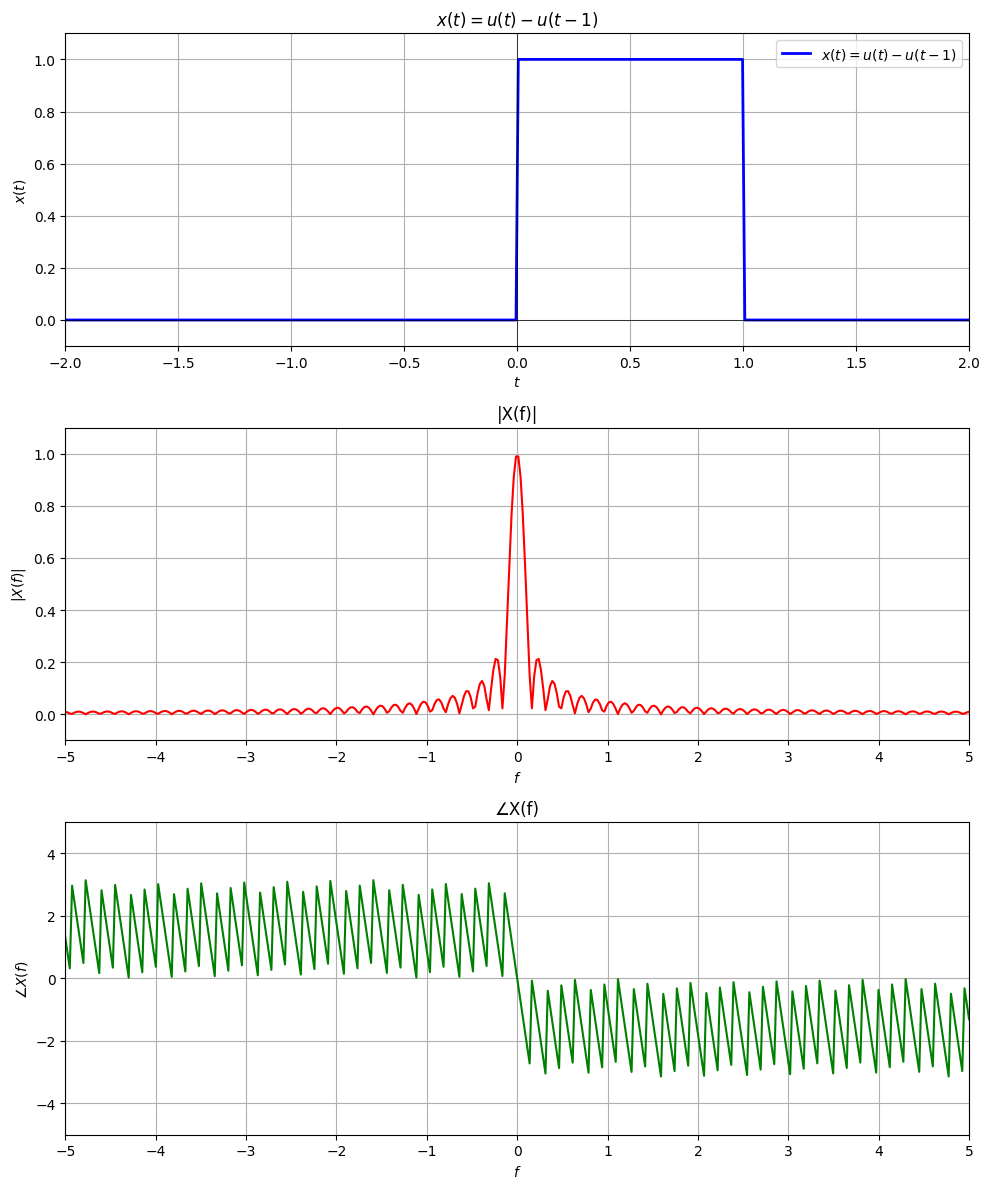

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir la función escalón unitario
def escalon(t):
    return np.where(t >= 0, 1, 0)

# Definir la señal x(t)
def x_a(t):
    return escalon(t) - escalon(t - 1)

# Rango de valores para t
t = np.linspace(-2, 2, 400)

# Calcular los valores de x(t)
x_a_val = x_a(t)

# Graficar x(t)
plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
plt.plot(t, x_a_val, label='$x(t) = u(t) - u(t-1)$', color='blue', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-0.1, 1.1)
plt.title('$x(t) = u(t) - u(t-1)$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.legend()

# Definir variables simbólicas
t_sym, w, f = sp.symbols('t w f')

# Definir la señal simbólica x(t)
x_a_sym = sp.Heaviside(t_sym) - sp.Heaviside(t_sym - 1)

# Calcular la transformada de Fourier de x(t)
X_w = sp.fourier_transform(x_a_sym, t_sym, w)
X_f = X_w.subs(w, 2 * sp.pi * f)

# Calcular el módulo de la transformada de Fourier
XM = sp.Abs(X_f)

# Graficar el módulo de la transformada de Fourier
f_vals = np.linspace(-5, 5, 400)
XM_vals = [sp.Abs(XM.subs(f, val)).evalf() for val in f_vals]  # Ensure values are real
plt.subplot(3, 1, 2)
plt.plot(f_vals, XM_vals, 'r')
plt.xticks(np.arange(-5, 6, 1))
plt.axis([-5, 5, -0.1, 1.1])
plt.grid()
plt.title('|X(f)|')
plt.xlabel('$f$')
plt.ylabel('$|X(f)|$')

# Calcular la fase de la transformada de Fourier
XP = sp.arg(X_f)

# Graficar la fase de la transformada de Fourier
XP_vals = [XP.subs(f, val).evalf() for val in f_vals]
plt.subplot(3, 1, 3)
plt.plot(f_vals, XP_vals, 'g')
plt.xticks(np.arange(-5, 6, 1))
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.title('∠X(f)')
plt.xlabel('$f$')
plt.ylabel('$∠X(f)$')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir la función escalón unitario
def escalon(t):
    return np.where(t >= 0, 1, 0)

# Definir la función rectangular
def rect(t):
    return np.where(np.abs(t) <= 0.5, 1, 0)

# Definir la señal x(t)
def x_b(t):
    return 5*rect((t+2)/4)

# Rango de valores para t
t = np.linspace(-2, 2, 400)

# Calcular los valores de x(t)
x_b_val = x_b(t)

# Graficar x(t)
plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
plt.plot(t, x_b_val, label='$x(t) = u(t) - u(t-1)$', color='blue', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-0.1, 1.1)
plt.title('$x(t) = 5*rect((t+2)/4)$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.legend()

# Definir variables simbólicas
t_sym, w, f = sp.symbols('t w f')

# Definir la señal simbólica x(t)
x_b_sym = sp.Heaviside(t_sym) - sp.Heaviside(t_sym - 1)

# Calcular la transformada de Fourier de x(t)
X_w = sp.fourier_transform(x_sym, t_sym, w)
X_f = X_w.subs(w, 2 * sp.pi * f)

# Calcular el módulo de la transformada de Fourier
XM = sp.Abs(X_f)

# Graficar el módulo de la transformada de Fourier
f_vals = np.linspace(-5, 5, 400)
XM_vals = [sp.Abs(XM.subs(f, val)).evalf() for val in f_vals]  # Ensure values are real
plt.subplot(3, 1, 2)
plt.plot(f_vals, XM_vals, 'r')
plt.xticks(np.arange(-5, 6, 1))
plt.axis([-5, 5, -0.1, 1.1])
plt.grid()
plt.title('|X(f)|')
plt.xlabel('$f$')
plt.ylabel('$|X(f)|$')

# Calcular la fase de la transformada de Fourier
XP = sp.arg(X_f)

# Graficar la fase de la transformada de Fourier
XP_vals = [XP.subs(f, val).evalf() for val in f_vals]
plt.subplot(3, 1, 3)
plt.plot(f_vals, XP_vals, 'g')
plt.xticks(np.arange(-5, 6, 1))
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.title('∠X(f)')
plt.xlabel('$f$')
plt.ylabel('$∠X(f)$')

plt.tight_layout()
plt.show()